# Prediction of volume S&P 500
- 2010/01/01 - 2014/07/31

In [83]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error

In [5]:
%matplotlib notebook

In [110]:
df = pd.read_csv('data/sp500_2010_01_01-2014_07_31.csv')
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.set_index('Date')

### Split data

In [111]:
df.shape

(1152, 6)

In [112]:
SPLIT = 0.8

train_end = int(SPLIT * SPLIT * df.shape[0])
val_end = int(SPLIT * df.shape[0])

tr = df.iloc[:val_end]

data_train = df.iloc[:train_end]
data_train.shape

(737, 6)

In [89]:
data_val = df.iloc[train_end:val_end]
data_val.shape

(184, 6)

In [90]:
data_test = df.iloc[val_end:]
data_test.shape

(231, 6)

In [91]:
data_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000


<IPython.core.display.Javascript object>


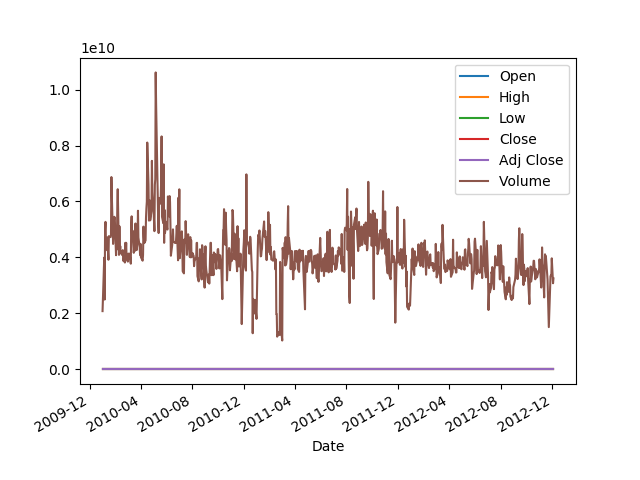

In [92]:
data_train.plot();

<IPython.core.display.Javascript object>


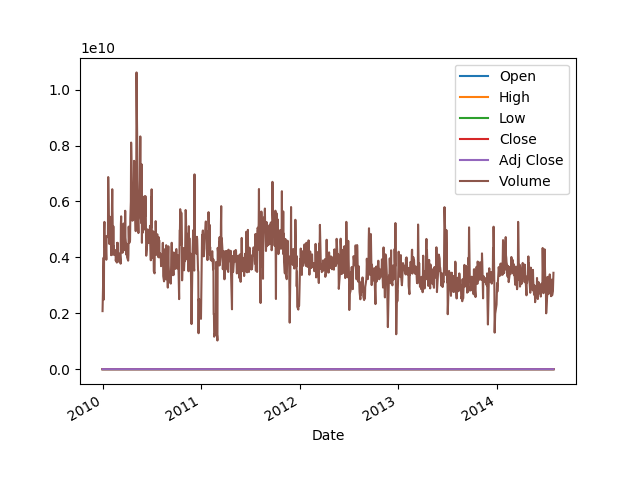

In [132]:
df.plot();

<IPython.core.display.Javascript object>


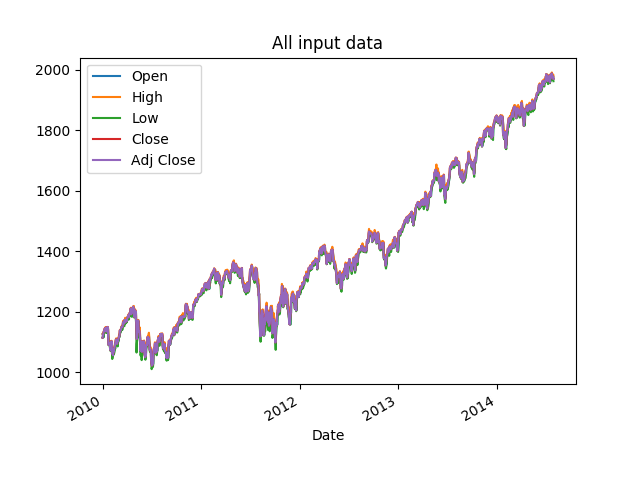

In [130]:
df.drop('Volume', axis=1).plot()
plt.title('All input data');

<IPython.core.display.Javascript object>


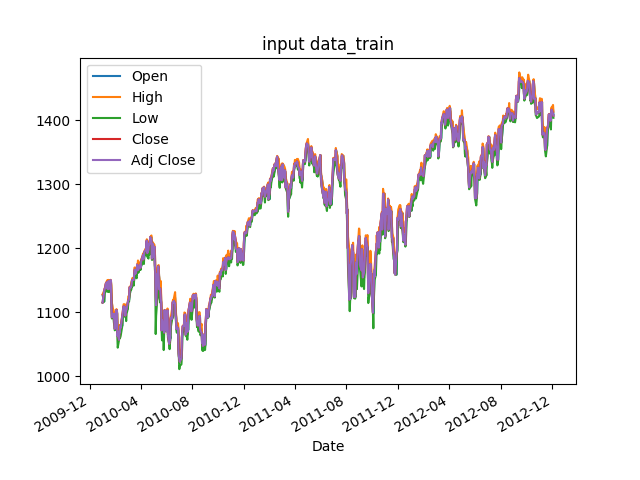

In [131]:
data_train.drop('Volume', axis=1).plot()
plt.title('input data_train');

# Baseline

In [95]:
r2_score(data_train['Volume'].iloc[1:], data_train['Volume'][0:-1])

0.3856198805446692

In [36]:
r2_score(data_val['Volume'].iloc[1:], data_val['Volume'][0:-1])

0.060724353343080906

In [29]:
r2_score(data_test['Volume'].iloc[1:], data_test['Volume'][0:-1])

-0.16146261915515048

In [30]:
r2_score(df['Volume'].iloc[1:], df['Volume'][0:-1])

0.43726568478083416

# Normalize data

- normalize to [0, 1]
- with clipping?

In [121]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler.fit(data_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [119]:
data_train = scaler.transform(data_train)

<IPython.core.display.Javascript object>


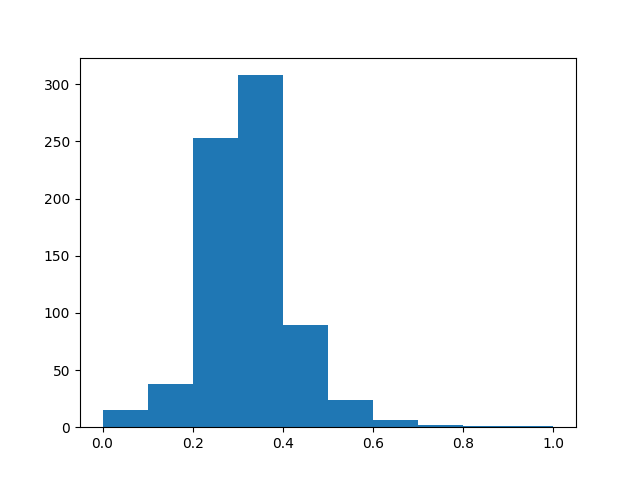

In [126]:
plt.figure()
plt.hist(scaler.transform(data_train)[:,-1]);

<IPython.core.display.Javascript object>


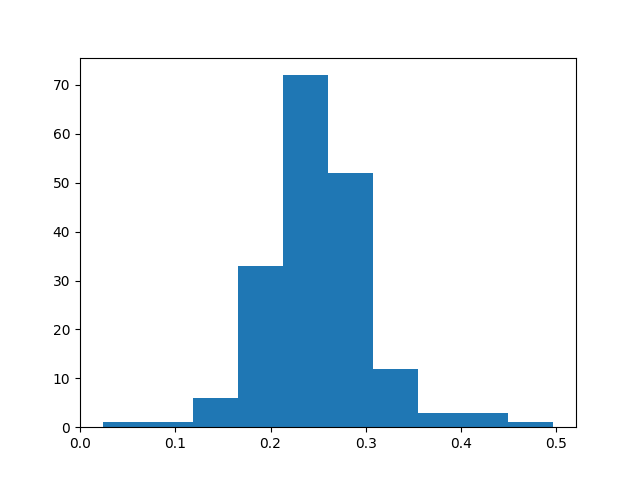

In [128]:
plt.figure()
plt.hist(scaler.transform(data_val)[:,-1]);

<IPython.core.display.Javascript object>


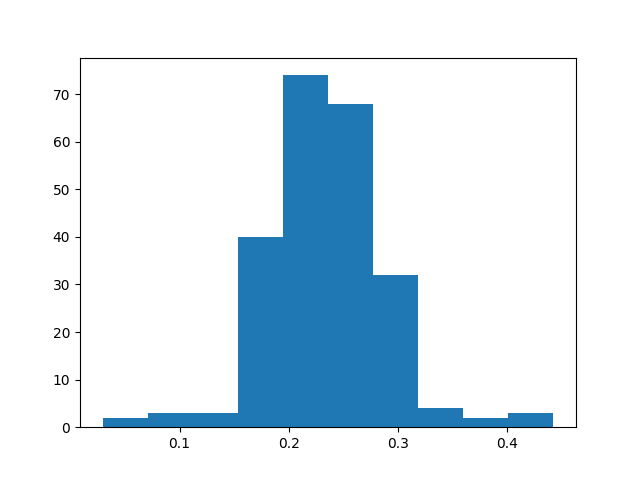

In [129]:
plt.figure()
plt.hist(scaler.transform(data_test)[:,-1]);

# Load economic calendar

In [150]:
econ_cal = pd.read_csv('data/econ_calendar.csv').set_index('timestamp')

In [151]:
econ_cal.head()

,currency,impact,event,actual,forecast,previous
timestamp,,,,,,
2010-01-01 00:00:00,CHF,Non-Economic,Bank Holiday,NaN,NaN,NaN
2010-01-01 00:00:00,EUR,Non-Economic,French Bank Holiday,NaN,NaN,NaN
2010-01-01 00:00:00,EUR,Non-Economic,German Bank Holiday,NaN,NaN,NaN
2010-01-01 00:00:00,EUR,Non-Economic,Italian Bank Holiday,NaN,NaN,NaN
2010-01-01 00:00:00,GBP,Non-Economic,Bank Holiday,NaN,NaN,NaN


In [152]:
econ_cal.describe()

,currency,impact,event,actual,forecast,previous
count,21377,21377,21377,17235,13848,17224
unique,10,4,458,4095,2928,4093
top,USD,Medium Impact Expected,Bank Holiday,0.1%,0.2%,0.1%
freq,5321,8780,424,466,665,476


In [154]:
econ_cal['event'].value_counts()

Bank Holiday                            424
Unemployment Rate                       420
Trade Balance                           403
Retail Sales m/m                        305
Crude Oil Inventories                   249
Natural Gas Storage                     249
Unemployment Claims                     249
CB Leading Index m/m                    222
Manufacturing PMI                       213
Current Account                         206
PPI m/m                                 173
CPI m/m                                 172
Industrial Production m/m               171
Retail Sales y/y                        165
10-y Bond Auction                       162
Final Manufacturing PMI                 142
Core Retail Sales m/m                   130
Monetary Policy Meeting Minutes         120
30-y Bond Auction                       118
Consumer Confidence                     117
Employment Change                       114
PPI y/y                                 114
Core CPI m/m                    